In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
def plot(x, y, p):
  fig = plt.figure(figsize=(11, 7), dpi=100)
  ax = fig.gca(projection='3d')
  X, Y = np.meshgrid(x, y)
  surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=plt.cm.viridis,
          linewidth=0, antialiased=False)
  ax.set_xlim(0, 2)
  ax.set_ylim(0, 2)
  ax.view_init(30, 225)
  ax.set_xlabel('$x$')
  ax.set_ylabel('$y$')

In [8]:
nx = 50
ny = 50
nt  = 100
xmin = 0
xmax = 2
ymin = 0
ymax = 1
dx = (xmax - xmin) / (nx - 1)
dy = (ymax - ymin) / (ny - 1)
p  = np.zeros((ny, nx))
pd = np.zeros((ny, nx))
b  = np.zeros((ny, nx))
x  = np.linspace(xmin, xmax, nx)
y  = np.linspace(xmin, xmax, ny)

# Source term for the b calculation
b[int(ny / 4), int(nx / 4)]  = 100
b[int(3 * ny / 4), int(3 * nx / 4)] = -100

In [9]:
def poisson(p, y, dx, dy, tol=1e-5):
  norm = 1
  while norm > tol:
    p_copy = p.copy()

    p[1:-1,1:-1] = ((dy**2 * (p_copy[1:-1,2:] + p_copy[1:-1,0:-2])) + 
                    (dx**2 * (p_copy[2:,1:-1] + p_copy[0:-2,1:-1]) - 
                     (b[1:-1,1:-1]* dx**2 * dy**2) )) / (2*(dx**2 + dy**2))
    
    p[:,0] = 0
    p[:,-1] = 0
    p[0,:] = 0 
    p[-1,:] = 0

    norm = (np.sum(np.abs(p[:]) - np.abs(p_copy[:])) /
                np.sum(np.abs(p_copy[:])))   
  return p 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


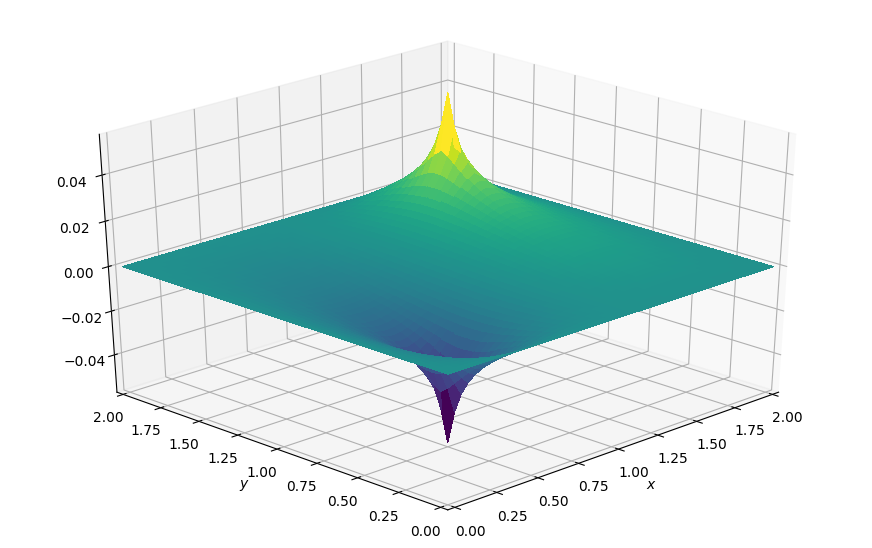

In [10]:
plot(x, y, poisson(p, y, dx, dy))
